<a href="https://colab.research.google.com/github/Saniya-BZ/Innomatics_Research_Labs_Hackathon_Project/blob/main/Innomatics_Research_Labs_Hackathon_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_m = pd.read_csv('/content/movies.csv')
df_r = pd.read_csv('/content/ratings.csv')
df_l = pd.read_csv('/content/ratings.csv')
df_t = pd.read_csv('/content/tags.csv')


##The number of ".csv" files are available in the dataset are : 4

In [4]:
import os
directory = '/content/'

files = os.listdir(directory)

csv_files = [file for file in files if file.endswith('.csv')]
csv_count = len(csv_files)

print(f"Number of CSV files: {csv_count}")

Number of CSV files: 4


## The shape of "movies.csv" is : (9742, 3)

In [6]:
df_m.shape

(9742, 3)

## The shape of "ratings.csv" is (100836, 4)

In [7]:
df_r.shape

(100836, 4)

## The Number of unique "userId" are available in "ratings.csv" are : 610


In [28]:
unique_users = df_r['userId'].nunique()
print(f"The number of unique 'userId' in 'ratings.csv' is: {unique_users}")

The number of unique 'userId' in 'ratings.csv' is: 610


## The movie that have recieved maximum number of user ratings is : Forrest Gump


In [9]:
movie_rating_counts = df_r['movieId'].value_counts()
max_rated_movie_id = movie_rating_counts.idxmax()
max_rated_movie_title = df_m[df_m['movieId'] == max_rated_movie_id]['title'].values[0]

print(f"The movie with the most user ratings is: '{max_rated_movie_title}'")

The movie with the most user ratings is: 'Forrest Gump (1994)'


## The correct tags submitted by users to "Matrix, The (1999)" movie are : 1. Alternate Universe 2. Philosophy 3. Post apocalyptic

In [10]:
matrix_movie_id = df_m[df_m['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = df_t[df_t['movieId'] == matrix_movie_id]['tag'].unique()
print(f"Tags for 'Matrix, The (1999)': {matrix_tags}")

Tags for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


## The average user rating for movie named "Terminator 2: Judgment Day (1991) is: 3.97

In [11]:
terminator_movie_id = df_m[df_m['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_ratings = df_r[df_r['movieId'] == terminator_movie_id]['rating']
average_rating = terminator_ratings.mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


## The data distribution of user ratings for "Fight Club (1999)" movie looks like: Left Skewed Distribution


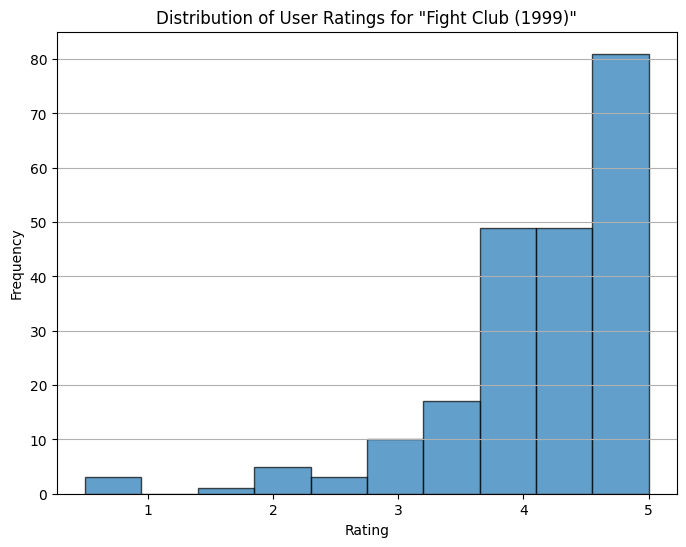

In [12]:
fight_club_movie_id = df_m[df_m['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = df_r[df_r['movieId'] == fight_club_movie_id]['rating']

plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

## Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings

In [13]:
rating_stats = df_r.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
rating_stats.columns = ['movieId', 'rating_count', 'rating_mean']
print(rating_stats.head())

   movieId  rating_count  rating_mean
0        1           215     3.920930
1        2           110     3.431818
2        3            52     3.259615
3        4             7     2.357143
4        5            49     3.071429


## Apply inner join on dataframe created from movies.csv and the grouped df from step 1

In [14]:
rating_stats = df_r.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
rating_stats.columns = ['movieId', 'rating_count', 'rating_mean']
merged_df = pd.merge(df_m, rating_stats, on='movieId', how='inner')
print(merged_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
3                         Comedy|Drama|Romance             7     2.357143  
4                                       Comedy            49     3.071429  


## Filter only those movies which have more than 50 user ratings (i.e. > 50)

In [15]:
rating_stats = df_r.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
rating_stats.columns = ['movieId', 'rating_count', 'rating_mean']

merged_df = pd.merge(df_m, rating_stats, on='movieId', how='inner')
filtered_movies_df = merged_df[merged_df['rating_count'] > 50]
print(filtered_movies_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


## The most popular movie based on  average user ratings is: Shawshank Redemption, The (1994)' with an average rating of 4.43

In [16]:
most_popular_movie = filtered_movies_df.loc[filtered_movies_df['rating_mean'].idxmax()]

most_popular_movie_title = most_popular_movie['title']
most_popular_movie_rating = most_popular_movie['rating_mean']

print(f"The most popular movie based on average user ratings is '{most_popular_movie_title}' with an average rating of {most_popular_movie_rating:.2f}.")

The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43.


## The top 5 popular movies based on number of user ratings :  1. Forrest Gump 2. Shawshank Redemption 3. The Pulp Fiction

In [17]:
top_movies_df = filtered_movies_df.sort_values(by='rating_count', ascending=False)
top_5_movies = top_movies_df.head(5)

print(top_5_movies[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### The Sci-Fi movie which is "third most popular" based on the number of user ratings : Jurassic Park (1993) with 238 ratings

In [18]:
sci_fi_movies_df = filtered_movies_df[filtered_movies_df['genres'].str.contains('Sci-Fi')]
sorted_sci_fi_movies_df = sci_fi_movies_df.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi_movie = sorted_sci_fi_movies_df.iloc[2]

movie_title = third_most_popular_sci_fi_movie['title']
rating_count = third_most_popular_sci_fi_movie['rating_count']

print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{movie_title}' with {rating_count} ratings.")

The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)' with 238 ratings.


In [20]:
filtered_movies_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [25]:
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import numpy as np


links_df = pd.read_csv('/content/links.csv')

filtered_movies = filtered_movies_df[filtered_movies_df['rating_count'] > 50]
filtered_movies = pd.merge(filtered_movies, links_df[['movieId', 'imdbId']], on='movieId')


filtered_movies['imdb_rating'] = filtered_movies['imdbId'].apply(lambda x: scrapper(x))

time.sleep(2)

print(filtered_movies[['title', 'imdb_rating']].head())

Scraping URL: https://www.imdb.com/title/tt0114709/
Scraping URL: https://www.imdb.com/title/tt0113497/
Scraping URL: https://www.imdb.com/title/tt0113228/
Scraping URL: https://www.imdb.com/title/tt0113277/
Scraping URL: https://www.imdb.com/title/tt0114319/
Scraping URL: https://www.imdb.com/title/tt0113189/
Scraping URL: https://www.imdb.com/title/tt0112346/
Scraping URL: https://www.imdb.com/title/tt0112641/
Scraping URL: https://www.imdb.com/title/tt0114388/
Scraping URL: https://www.imdb.com/title/tt0112281/
Scraping URL: https://www.imdb.com/title/tt0113161/
Scraping URL: https://www.imdb.com/title/tt0113627/
Scraping URL: https://www.imdb.com/title/tt0114746/
Scraping URL: https://www.imdb.com/title/tt0112431/
Scraping URL: https://www.imdb.com/title/tt0112818/
Scraping URL: https://www.imdb.com/title/tt0112697/
Scraping URL: https://www.imdb.com/title/tt0114369/
Scraping URL: https://www.imdb.com/title/tt0114148/
Scraping URL: https://www.imdb.com/title/tt0114814/
Scraping URL

In [24]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"

    print(f"Scraping URL: {URL}")  # Debugging output

    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    response = requests.get(URL, headers=request_header)

    if response.status_code != 200:
        print(f"Failed to retrieve {URL}, status code: {response.status_code}")
        return np.nan

    soup = BeautifulSoup(response.text, 'html.parser')

    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})

    if imdb_rating:
        return imdb_rating.text
    else:
        print(f"Could not find rating for {URL}")
        return np.nan

## The movieId of the movie which has the highest IMDB rating is : Shawshank Redemption,(movieId: 318) with a rating of 9.3

In [26]:
filtered_movies['imdb_rating'] = pd.to_numeric(filtered_movies['imdb_rating'], errors='coerce')

max_imdb_index = filtered_movies['imdb_rating'].idxmax()
max_imdb_movieId = filtered_movies.loc[max_imdb_index, 'movieId']
max_imdb_movie_title = filtered_movies.loc[max_imdb_index, 'title']
max_imdb_rating = filtered_movies.loc[max_imdb_index, 'imdb_rating']

print(f"The movie  '{max_imdb_movie_title}' (movieId: {max_imdb_movieId}) with a rating of {max_imdb_rating}.")

The movie  'Shawshank Redemption, The (1994)' (movieId: 318) with a rating of 9.3.


## The movieId of the "Sci-Fi" movie which has the highest IMDB rating is : The Sci-Fi  'Inception (2010)' (movieId: 79132) with a rating of 8.8

In [27]:
filtered_movies['imdb_rating'] = pd.to_numeric(filtered_movies['imdb_rating'], errors='coerce')

sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', na=False)]
max_imdb_index_sci_fi = sci_fi_movies['imdb_rating'].idxmax()
max_imdb_movieId_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'movieId']
max_imdb_movie_title_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'title']
max_imdb_rating_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'imdb_rating']

print(f"The Sci-Fi  '{max_imdb_movie_title_sci_fi}' (movieId: {max_imdb_movieId_sci_fi}) with a rating of {max_imdb_rating_sci_fi}.")

The Sci-Fi  'Inception (2010)' (movieId: 79132) with a rating of 8.8.
